## Import Libraries

In [125]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from catboost import CatBoostClassifier, Pool
# Import ML pipeline:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from xgboost import XGBClassifier  # Import the correct class
from scikeras.wrappers import KerasClassifier





## Load Dataset

In [28]:
# fetching dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

# variable information 
print(iris.variables) 




           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


## Dataset Overview

In [3]:
# Basic dataset overview
print("Dataset Overview:")
print(f"Number of observations: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature columns: {list(X.columns)}")
print(f"Target column: {y.columns[0]}")


Dataset Overview:
Number of observations: 150
Number of features: 4
Feature columns: ['sepal length', 'sepal width', 'petal length', 'petal width']
Target column: class


In [4]:
# Class distribution 
class_counts = y[y.columns[0]].value_counts()
class_proportions = class_counts / y.shape[0]

# printing class distribution 
print("Class Distribution:")
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} observations ({class_proportions[cls]:.2%})")

Class Distribution:
Class Iris-setosa: 50 observations (33.33%)
Class Iris-versicolor: 50 observations (33.33%)
Class Iris-virginica: 50 observations (33.33%)


In [5]:
# Summary statistics for features
print("Feature Summary Statistics:")
print(X.describe())

Feature Summary Statistics:
       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# Verifying data types
display(X.dtypes)
display(y.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object

class    object
dtype: object

Findings:
- The dataset contains a total of 150 observations, with an equal distribution across the three classes (50 observations per class)
- There are four feature variables: sepal length, sepal width, petal length, and petal width 
- There are no missing values 
- Petal dimensions show a wider range and greater variability compared to sepal dimensions, indicating more diversity in petal sizes among samples
- The relatively close median and mean values for each feature suggest that the distributions might be roughly symmetric, though there could be slight skew due to some minimum and maximum values, particularly for petal length

## Preparing Data

In [29]:
# Changing y to a 1-D array 
y = y.values.ravel()

# Encoding labels to be numerical values 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = pd.Categorical(y_encoded)

In [32]:
y_encoded = y_encoded.to_numpy()

In [33]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42)

In [26]:
display(y_train)

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [26]:
display(X_train.describe())
display(X_test.describe())

,sepal length,sepal width,petal length,petal width
count,112.000000,112.000000,112.000000,112.000000
mean,5.830357,3.035714,3.808036,1.213393
std,0.819123,0.433892,1.734085,0.749233
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.700000,4.200000,6.700000,2.500000


,sepal length,sepal width,petal length,petal width
count,38.000000,38.000000,38.000000,38.000000
mean,5.881579,3.107895,3.613158,1.155263
std,0.863949,0.433952,1.867238,0.811637
min,4.400000,2.200000,1.000000,0.100000
25%,5.125000,2.800000,1.525000,0.300000
50%,5.900000,3.100000,4.450000,1.300000
75%,6.475000,3.375000,5.075000,1.875000
max,7.900000,4.400000,6.900000,2.300000


Note: I am putting aside the testing dataset until I am ready to evaluate my model on unseen data. 

## Exploratory Data Analysis

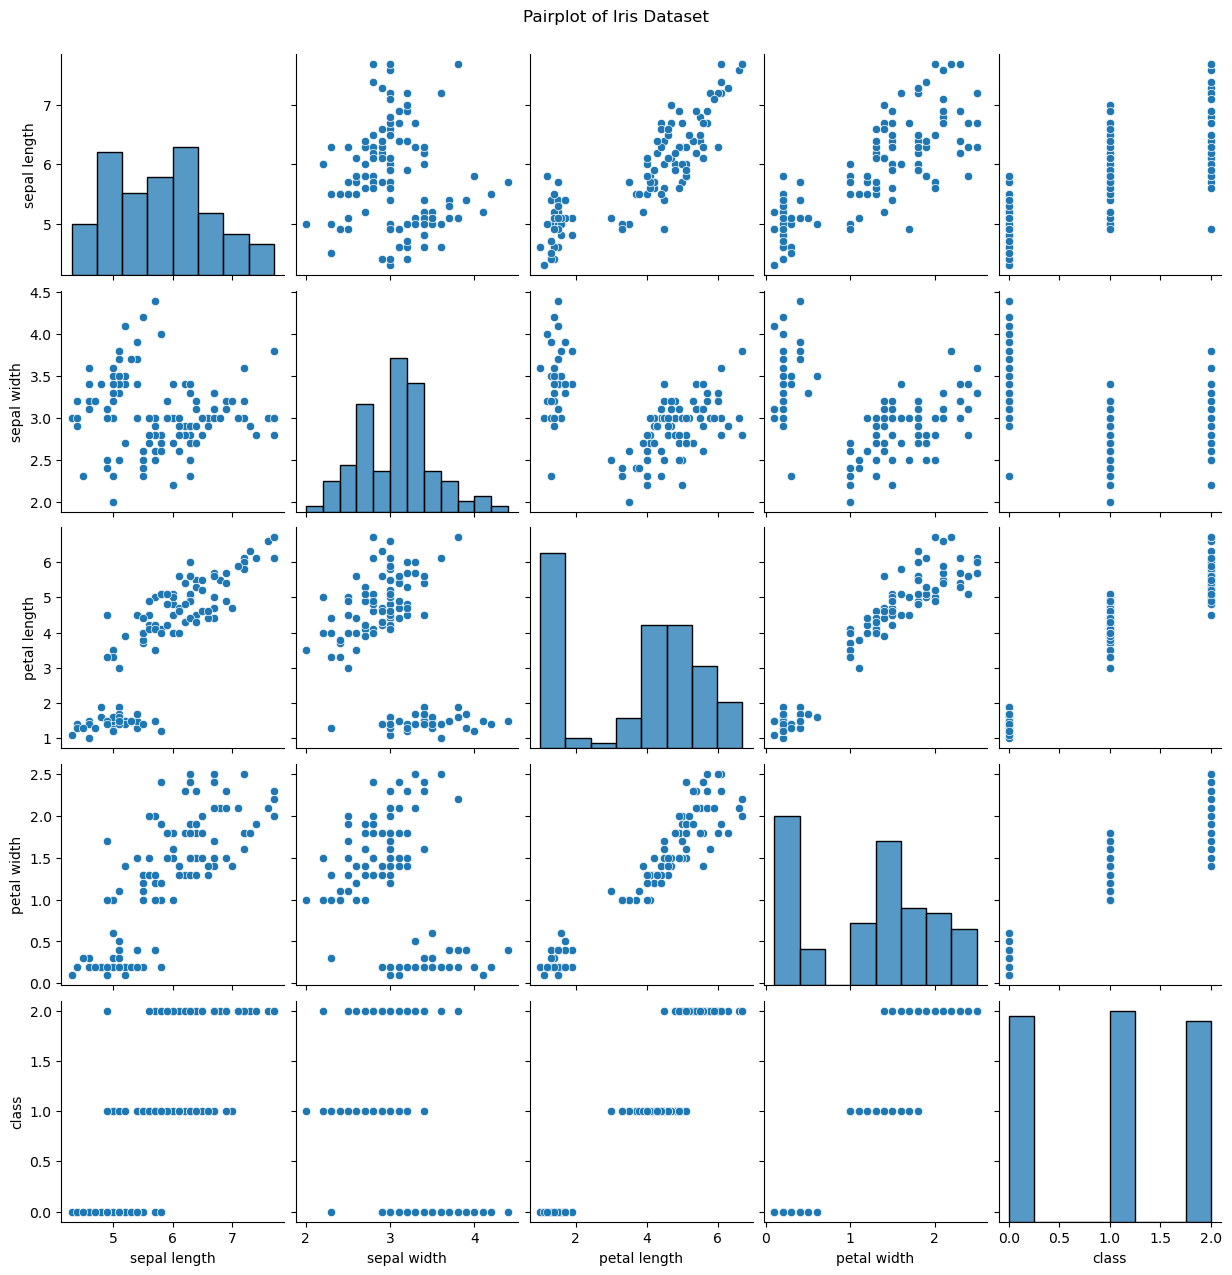

In [11]:
df_train = X_train.copy()
df_train['class'] = y_train

sns.pairplot(df_train, diag_kind="hist")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

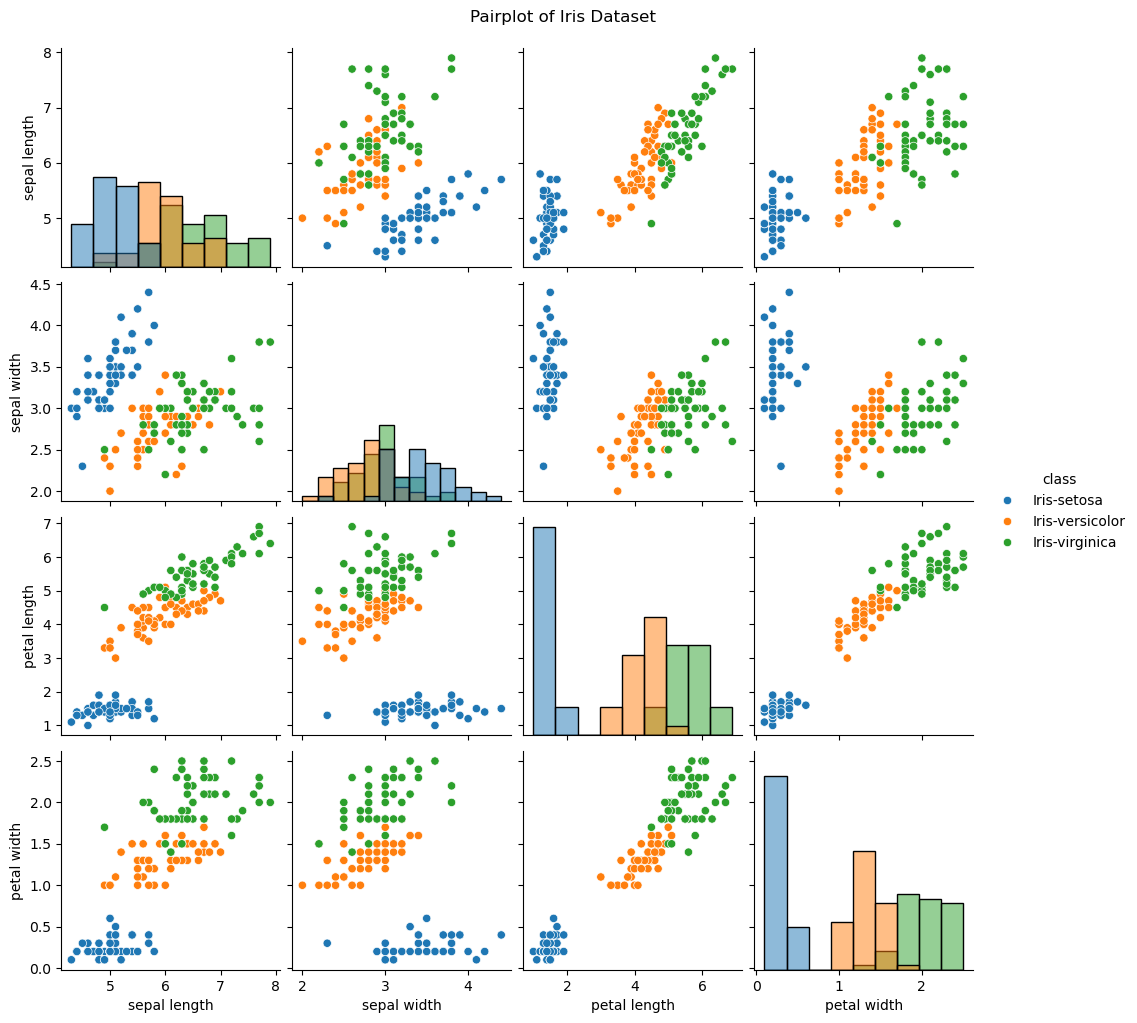

In [ ]:
sns.pairplot(pd.concat([X, y], axis=1), hue=y.columns[0], diag_kind="hist")
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

## Machine Learning Methods

In [206]:
# Function to build NN
def create_neural_network():
    classifier = Sequential([
        Input(shape=(4,)), 
        Dense(10, activation='relu'),
        Dense(8, activation='relu'),  # Increased units
        Dense(3, activation='softmax')  # Output layer with 3 units for 3 classes
    ])
    classifier.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer='adam'
    )
    
    return classifier

In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [207]:
k_features = X_train.shape[1]
model = Sequential([
    Input(shape=(4,)), 
    Dense(10, activation='relu'),  # Increased units
    Dense(8, activation='relu'),    # Added another hidden layer
    Dense(3, activation='softmax')  # Output layer with 3 units for 3 classes
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)

In [209]:
X_train1, X_cv, y_train2, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=41)

In [210]:
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)

In [211]:
# Set random seed
tf.keras.utils.set_random_seed(0)  

# Train model
model.fit(X_train1, y_train2, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 3.0351 
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 2.7724 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3464 - loss: 2.4028 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3464 - loss: 2.0179 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3464 - loss: 1.6714 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3698 - loss: 1.3881 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5195 - loss: 1.1868 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6276 - loss: 1.0406 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6615 - loss: 0.9146 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6016 - loss: 0.8036 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5807 - loss: 0.7107 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7930 - los

In [212]:
X_cv_scaled = scaler.transform(X_cv)


In [213]:
# Making predictions
predictions = model.predict(X_cv_scaled)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Display predicted classes
print("Predicted classes:", predicted_classes)

# If you want to compare with true labels
print("True classes:", y_cv)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted classes: [1 0 2 2 0 2 2 1 1 2 0 1 0 2 1 1 1 2 1 1 2 0 0 2]
True classes: [1 0 2 2 0 1 2 1 1 2 0 1 0 1 1 1 1 2 1 1 2 0 0 2]


In [214]:
# Calculate accuracy
accuracy = accuracy_score(y_cv, predicted_classes)

# Display predicted classes and accuracy
print("Predicted classes:", predicted_classes)
print("True classes:", y_cv)
print("Accuracy:", accuracy)

Predicted classes: [1 0 2 2 0 2 2 1 1 2 0 1 0 2 1 1 1 2 1 1 2 0 0 2]
True classes: [1 0 2 2 0 1 2 1 1 2 0 1 0 1 1 1 1 2 1 1 2 0 0 2]
Accuracy: 0.9166666666666666


In [195]:
pipe_multimodel = Pipeline([('preprocessing', None),
                            ('classifier', None)])



In [204]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None]}, 
    {'classifier': [RandomForestClassifier()]}, 
    {'classifier': [KNeighborsClassifier()], 'preprocessing': [StandardScaler(), None]},
    {'classifier': [KerasClassifier(create_neural_network)], 'preprocessing': [StandardScaler(), None], 'classifier__epochs': [100]}, 
    {'classifier': [XGBClassifier()]}, 
    {'classifier': [GaussianNB()], 'preprocessing': [StandardScaler(), None]}
]


In [215]:
grid = GridSearchCV(pipe_multimodel, param_grid, cv=5,
                          return_train_score=True,
                          n_jobs = -1, scoring=scoring_metrics, refit = False)

grid.fit(X_train,y_train)

# If you want to see the full results for all metrics
# Display the best estimator based on the 'accuracy' metric
# print("Best estimator based on accuracy:\n{}".format(grid.best_estimator_))

# Get cv_results_ as a DataFrame to easily sort and find the best models for each metric
df_results = pd.DataFrame(grid.cv_results_)

# Print out all scoring metrics for each model
results_list = []
metrics_cols = [col for col in df_results.columns if col.startswith("mean_test_")]
for i, row in df_results.iterrows():
    class_dict = {
        'Classifier': type(row['param_classifier']).__name__,
        'Preprocessing': row['param_preprocessing'],
        'Accuracy': row['mean_test_accuracy'],
        'Precision': row['mean_test_precision'],
        'Recall': row['mean_test_recall'],
        'F1': row['mean_test_f1']
    }
    results_list.append(class_dict)


df_results_table = pd.DataFrame(results_list)
df_results_table['Preprocessing'] = df_results_table['Preprocessing'].replace({np.nan: 'N/A'})
    # print(f"\nModel {i + 1}: {row['params']}")
    # for metric in metrics_cols:
    #     print(f"{metric.replace('mean_test_', '')}: {row[metric]}")



df_results_table[['Accuracy', 'Precision', 'Recall', 'F1']] = ((df_results_table[['Accuracy', 'Precision', 'Recall', 'F1']] * 100)).map(lambda x: f"{x:.2f}%")



# # Find the best model under each scoring metric
# best_models = {}
# for metric in scoring_metrics.keys():
#     # Sort by the mean test score of the metric in descending order and get the best model's parameters
#     best_index = results_df[f'mean_test_{metric}'].idxmax()
#     best_score = results_df[f'mean_test_{metric}'].max()
#     best_params = results_df.loc[best_index, 'params']
    
#     # Store the best model and its score for this metric
#     best_models[metric] = {'best_score': best_score, 'best_params': best_params}

# # Display the best model under each scoring metric
# for metric, best in best_models.items():
#     print(f"\nBest model for {metric}:")
#     print(f"Score: {best['best_score']}")
#     print(f"Parameters: {best['best_params']}")

/Users/gracebarringer/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/gracebarringer/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/gracebarringer/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/gracebarringer/opt/anaconda3/lib/python

In [200]:
display(df_results_table)

,Classifier,Preprocessing,Accuracy,Precision,Recall,F1
0,SVC,StandardScaler(),95.00%,94.87%,94.94%,94.87%
1,SVC,N/A,95.83%,95.80%,96.15%,95.85%
2,RandomForestClassifier,N/A,95.00%,94.80%,95.04%,94.88%
3,KNeighborsClassifier,StandardScaler(),89.17%,89.13%,88.31%,88.50%
4,KNeighborsClassifier,N/A,93.33%,93.64%,92.76%,93.03%
5,KerasClassifier,StandardScaler(),88.33%,89.84%,88.83%,87.61%
6,KerasClassifier,N/A,81.67%,72.53%,81.75%,75.17%
7,XGBClassifier,N/A,95.00%,94.79%,95.26%,94.86%
8,GaussianNB,StandardScaler(),95.00%,94.80%,95.04%,94.88%
9,GaussianNB,N/A,95.00%,94.80%,95.04%,94.88%


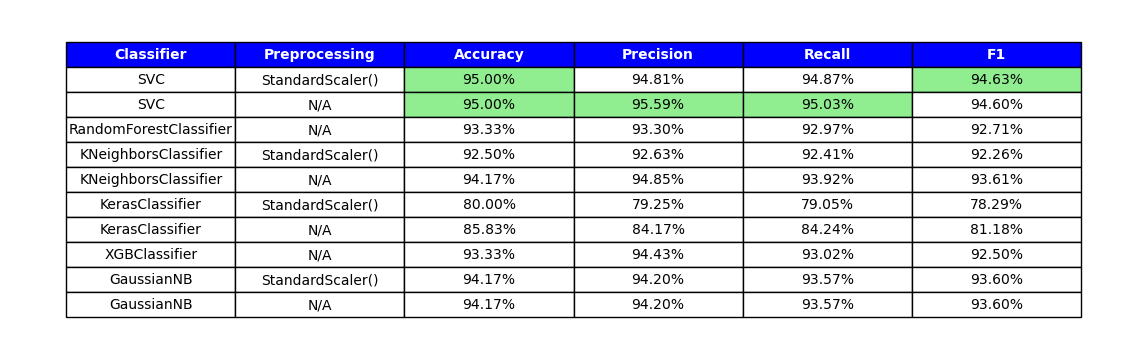

In [202]:

# Creating formatted table 
fig, list_subfig = plt.subplots(figsize = (12,4))

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)


table = list_subfig.table(cellText=df_results_table.values, 
                  colLabels=df_results_table.columns, 
                  loc='center', cellLoc='center')

table.scale(0.9, 1.5)  
list_subfig.axis('off')
# list_subfig.set_title('Top 10 Countries with Most Artifical Intelligence Publications')
# Highlight the maximum values for Accuracy, Precision, Recall, and F1
highlight_cols = ['Accuracy', 'Precision', 'Recall', 'F1']
for col in highlight_cols:
    max_value = df_results_table[col].max()
    for (i, j), cell in table.get_celld().items():
        if i > 0 and j == df_results_table.columns.get_loc(col):  # Check for data rows
            if df_results_table[col].iloc[i-1] == max_value:  # Adjust for header row
                cell.set_facecolor('lightgreen')  # Highlight color

# Highlight header row
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    cell.set_edgecolor('black')  

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# for (i, j), cell in table.get_celld().items():
#     if i == 0:  # Header row
#         cell.set_facecolor('blue')  
#         cell.set_text_props(color='white', weight='bold', fontsize=10)  
#     else:  
#         pass
#     cell.set_edgecolor('black')  

plt.show()

In [123]:
# Instantiate models with default parameters
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'KNN': KNeighborsClassifier(), 
    'XGBoost': XGBClassifier(), 
    'Naïve Bayes': GaussianNB()
}

In [ ]:
param_grid = {

In [120]:
# Defining scoring metrics
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

In [124]:
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}")
    model_scores = {}
    for metric_name, metric in scoring_metrics.items():
        try:
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
            model_scores[metric_name] = scores.mean()
            print(f"{metric_name.capitalize()} score: {model_scores[metric_name]:.4f}")
        except ValueError as e:
            print(f"Error with {metric_name} for {model_name}: {e}")
            model_scores[metric_name] = None
    results[model_name] = model_scores
    

Evaluating SVM
Accuracy score: 0.9500
Precision score: 0.9630
Recall score: 0.9500
F1 score: 0.9477
Evaluating Random Forest
Accuracy score: 0.9500
Precision score: 0.9637
Recall score: 0.9488
F1 score: 0.9408
Evaluating Neural Network
Accuracy score: 0.9667
Precision score: 0.9752
Recall score: 0.9655
F1 score: 0.9655
Evaluating KNN
Accuracy score: 0.9417
Precision score: 0.9563
Recall score: 0.9405
F1 score: 0.9391
Evaluating XGBoost
Accuracy score: 0.9333
Precision score: 0.9455
Recall score: 0.9321
F1 score: 0.9296
Evaluating Naïve Bayes
Accuracy score: 0.9417
Precision score: 0.9456
Recall score: 0.9405
F1 score: 0.9408


Model combination 
- sum based on 


Feature selection 
- Benefits: better fitting mdoel 
- cons: cutting features make sense for regularlization (limit model complexity)

- Variabble importance (how many time does variable appear is tree split)

In [36]:
train_scaler = StandardScaler()
X_train_scaled = train_scaler.fit_transform(X_train) 

test_scaler = StandardScaler()
X_test_scaled = test_scaler.fit_transform(X_test) 

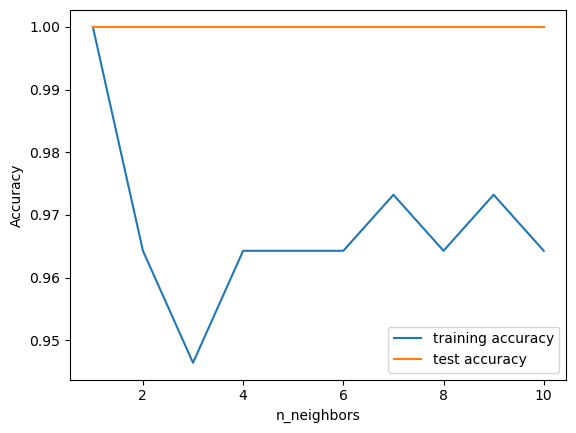

In [40]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

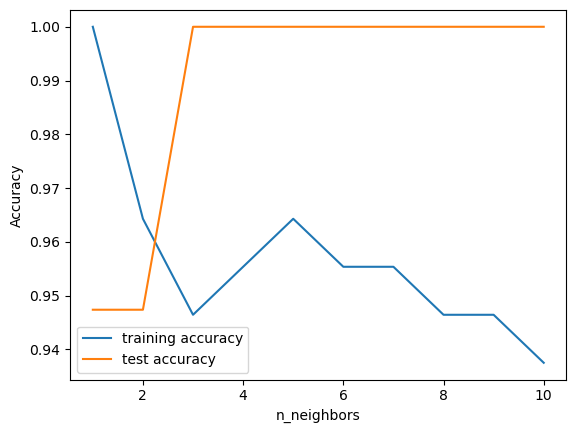

In [37]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train_scaled, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test_scaled, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


